In [1]:
import gzip
import json
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [2]:
import json

# File paths
file1 = "modcloth_final_data.json"
file2 = "renttherunway_final_data.json"

# Function to read JSON lines data from a file
def read_json_lines(file_path):
    data = []
    with open(file_path, 'r', encoding='utf-8') as f:
        for line in f:
            data.append(json.loads(line.strip()))  # Load each JSON object per line
    return data

# Load data from each file
modcloth_data = read_json_lines(file1)
renttherunway_data = read_json_lines(file2)

# Display the data (printing just the first entry for readability)
print("Modcloth Data Sample:", modcloth_data[0])
print("Rent the Runway Data Sample:", renttherunway_data[0])


Modcloth Data Sample: {'item_id': '123373', 'waist': '29', 'size': 7, 'quality': 5, 'cup size': 'd', 'hips': '38', 'bra size': '34', 'category': 'new', 'bust': '36', 'height': '5ft 6in', 'user_name': 'Emily', 'length': 'just right', 'fit': 'small', 'user_id': '991571'}
Rent the Runway Data Sample: {'fit': 'fit', 'user_id': '420272', 'bust size': '34d', 'item_id': '2260466', 'weight': '137lbs', 'rating': '10', 'rented for': 'vacation', 'review_text': "An adorable romper! Belt and zipper were a little hard to navigate in a full day of wear/bathroom use, but that's to be expected. Wish it had pockets, but other than that-- absolutely perfect! I got a million compliments.", 'body type': 'hourglass', 'review_summary': 'So many compliments!', 'category': 'romper', 'height': '5\' 8"', 'size': 14, 'age': '28', 'review_date': 'April 20, 2016'}


In [3]:
# Load datasets
modcloth_data = pd.read_json(file1, lines=True)
renttherunway_data = pd.read_json(file2, lines = True)

In [4]:
len(modcloth_data)

82790

In [5]:
print("First 5 rows of ModCloth data:")
print(modcloth_data.head())

print("\nFirst 5 rows of RentTheRunway data:")
print(renttherunway_data.head())

First 5 rows of ModCloth data:
   item_id  waist  size  quality cup size  hips  bra size category bust  \
0   123373   29.0     7      5.0        d  38.0      34.0      new   36   
1   123373   31.0    13      3.0        b  30.0      36.0      new  NaN   
2   123373   30.0     7      2.0        b   NaN      32.0      new  NaN   
3   123373    NaN    21      5.0     dd/e   NaN       NaN      new  NaN   
4   123373    NaN    18      5.0        b   NaN      36.0      new  NaN   

    height         user_name         length    fit  user_id  shoe size  \
0  5ft 6in             Emily     just right  small   991571        NaN   
1  5ft 2in  sydneybraden2001     just right  small   587883        NaN   
2  5ft 7in             Ugggh  slightly long  small   395665        9.0   
3      NaN      alexmeyer626     just right    fit   875643        NaN   
4  5ft 2in        dberrones1  slightly long  small   944840        NaN   

  shoe width review_summary review_text  
0        NaN            NaN    

In [6]:
# Display basic info
print("ModCloth Dataset Info:")
print(modcloth_data.info())
print("\nRentTheRunway Dataset Info:")
print(renttherunway_data.info())

ModCloth Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82790 entries, 0 to 82789
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   item_id         82790 non-null  int64  
 1   waist           2882 non-null   float64
 2   size            82790 non-null  int64  
 3   quality         82722 non-null  float64
 4   cup size        76535 non-null  object 
 5   hips            56064 non-null  float64
 6   bra size        76772 non-null  float64
 7   category        82790 non-null  object 
 8   bust            11854 non-null  object 
 9   height          81683 non-null  object 
 10  user_name       82790 non-null  object 
 11  length          82755 non-null  object 
 12  fit             82790 non-null  object 
 13  user_id         82790 non-null  int64  
 14  shoe size       27915 non-null  float64
 15  shoe width      18607 non-null  object 
 16  review_summary  76065 non-null  object 
 17  review_t

In [7]:
# Check for missing values
print("\nMissing Values in ModCloth:")
print(modcloth_data.isnull().sum())
print("\nMissing Values in RentTheRunway:")
print(renttherunway_data.isnull().sum())


Missing Values in ModCloth:
item_id               0
waist             79908
size                  0
quality              68
cup size           6255
hips              26726
bra size           6018
category              0
bust              70936
height             1107
user_name             0
length               35
fit                   0
user_id               0
shoe size         54875
shoe width        64183
review_summary     6725
review_text        6725
dtype: int64

Missing Values in RentTheRunway:
fit                   0
user_id               0
bust size         18411
item_id               0
weight            29982
rating               82
rented for           10
review_text           0
body type         14637
review_summary        0
category              0
height              677
size                  0
age                 960
review_date           0
dtype: int64


In [8]:
# Drop features with excessive missing values (>70%)
modcloth_data.drop(columns=['shoe size', 'shoe width', 'bust', 'waist'], inplace=True)

# Impute missing numeric features with median
modcloth_data['height'] = modcloth_data['height'].fillna('5ft 4in')  # Common average height
modcloth_data['size'] = modcloth_data['size'].fillna(modcloth_data['size'].median())
modcloth_data['quality'] = modcloth_data['quality'].fillna(modcloth_data['quality'].median())

# Impute missing categorical features with mode or 'unknown'
modcloth_data['cup size'] = modcloth_data['cup size'].fillna(modcloth_data['cup size'].mode()[0])
modcloth_data['bra size'] = modcloth_data['bra size'].fillna(modcloth_data['bra size'].mode()[0])
modcloth_data['hips'] = modcloth_data['hips'].fillna(modcloth_data['hips'].mode()[0])
modcloth_data['length'] = modcloth_data['length'].fillna(modcloth_data['length'].mode()[0])
modcloth_data['review_summary'] = modcloth_data['review_summary'].fillna("No Summary")
modcloth_data['review_text'] = modcloth_data['review_text'].fillna("No Review")

In [9]:
# Drop features with excessive missing values (>70%)
renttherunway_data.drop(columns=['weight'], inplace=True)

# Impute missing numeric features with median
renttherunway_data['height'] = renttherunway_data['height'].fillna('5ft 4in')  # Common average height
renttherunway_data['rating'] = renttherunway_data['rating'].fillna(renttherunway_data['rating'].median())
renttherunway_data['age'] = renttherunway_data['age'].fillna(renttherunway_data['age'].median())

# Impute missing categorical features with mode or 'unknown'
renttherunway_data['bust size'] = renttherunway_data['bust size'].fillna(renttherunway_data['bust size'].mode()[0])
renttherunway_data['body type'] = renttherunway_data['body type'].fillna("unknown")
renttherunway_data['rented for'] = renttherunway_data['rented for'].fillna("unknown")


In [11]:
# Check for missing values
print("\nMissing Values in ModCloth:")
print(modcloth_data.isnull().sum())
print("\nMissing Values in RentTheRunway:")
print(renttherunway_data.isnull().sum())


Missing Values in ModCloth:
item_id           0
size              0
quality           0
cup size          0
hips              0
bra size          0
category          0
height            0
user_name         0
length            0
fit               0
user_id           0
review_summary    0
review_text       0
dtype: int64

Missing Values in RentTheRunway:
fit               0
user_id           0
bust size         0
item_id           0
rating            0
rented for        0
review_text       0
body type         0
review_summary    0
category          0
height            0
size              0
age               0
review_date       0
dtype: int64


In [12]:
# Summary statistics
print("\nSummary Statistics for ModCloth:")
print(modcloth_data.describe(include='all'))
print("\nSummary Statistics for RentTheRunway:")
print(renttherunway_data.describe(include='all'))



Summary Statistics for ModCloth:
              item_id          size       quality cup size          hips  \
count    82790.000000  82790.000000  82790.000000    82790  82790.000000   
unique            NaN           NaN           NaN       12           NaN   
top               NaN           NaN           NaN        c           NaN   
freq              NaN           NaN           NaN    24625           NaN   
mean    469325.229170     12.661602      3.949100      NaN     38.628687   
std     213999.803314      8.271952      0.992376      NaN      5.410290   
min     123373.000000      0.000000      1.000000      NaN     30.000000   
25%     314980.000000      8.000000      3.000000      NaN     35.000000   
50%     454030.000000     12.000000      4.000000      NaN     36.000000   
75%     658440.000000     15.000000      5.000000      NaN     41.000000   
max     807722.000000     38.000000      5.000000      NaN     60.000000   

            bra size category   height user_name     

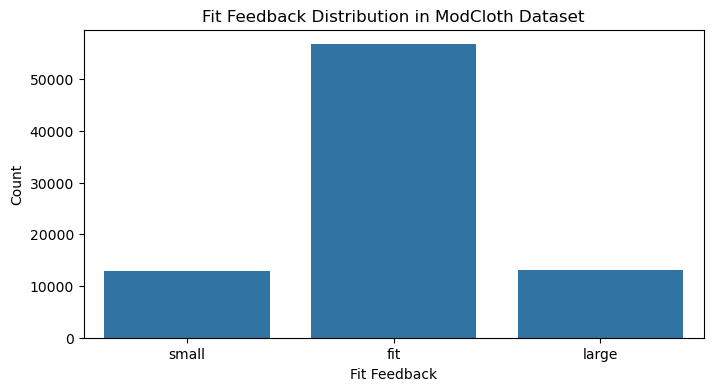

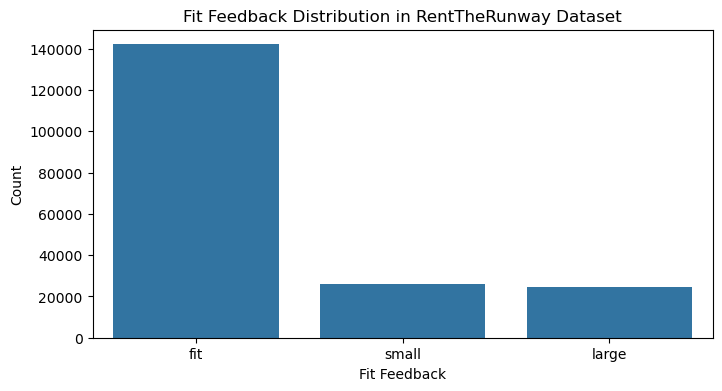

In [13]:
# Distribution of Fit Feedback
plt.figure(figsize=(8, 4))
sns.countplot(data=modcloth_data, x='fit')
plt.title("Fit Feedback Distribution in ModCloth Dataset")
plt.xlabel("Fit Feedback")
plt.ylabel("Count")
plt.show()

plt.figure(figsize=(8, 4))
sns.countplot(data=renttherunway_data, x='fit')
plt.title("Fit Feedback Distribution in RentTheRunway Dataset")
plt.xlabel("Fit Feedback")
plt.ylabel("Count")
plt.show()

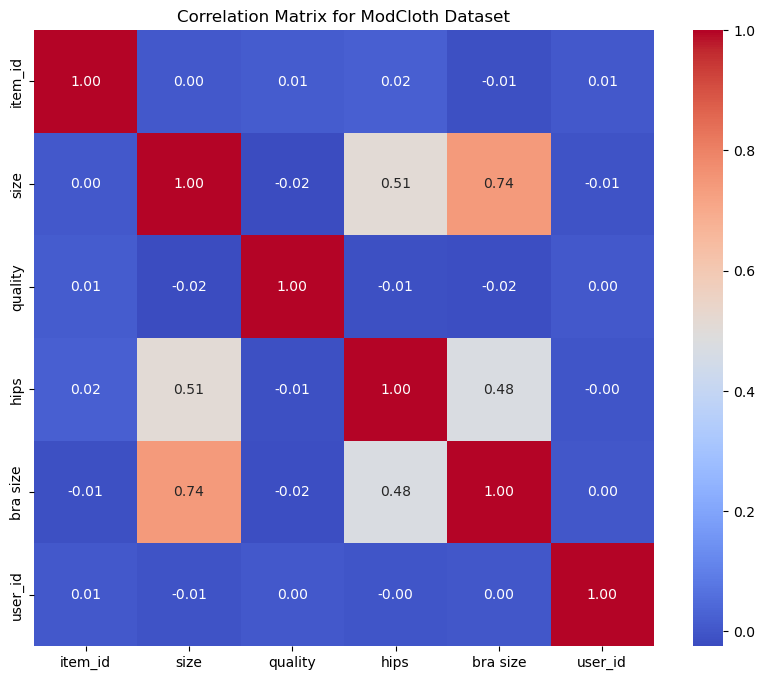

In [14]:
# Correlation matrix for numerical fields in ModCloth dataset
modcloth_corr = modcloth_data.select_dtypes(include=np.number).corr()
plt.figure(figsize=(10, 8))
sns.heatmap(modcloth_corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix for ModCloth Dataset")
plt.show()


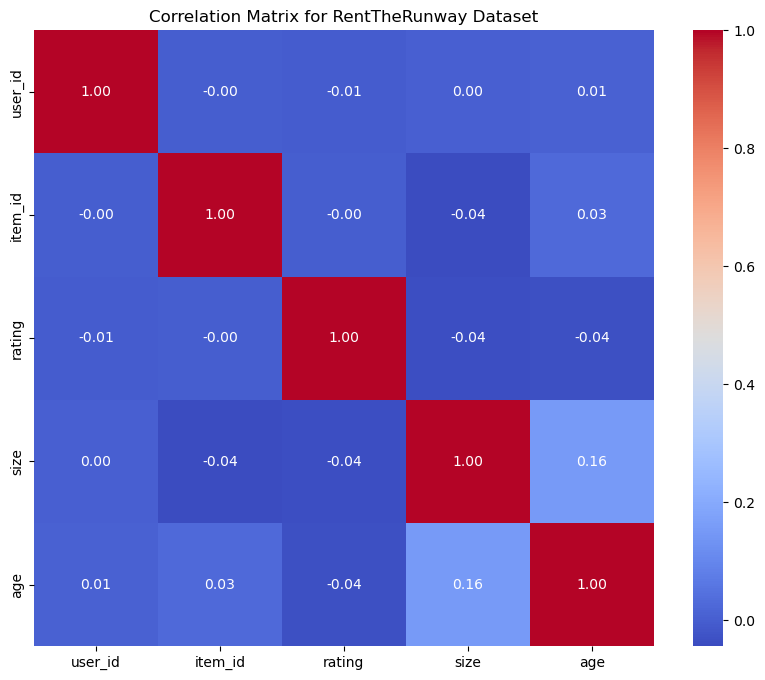

In [15]:
# Correlation matrix for numerical fields in RentTheRunway dataset
renttherunway_corr = renttherunway_data.select_dtypes(include=np.number).corr()
plt.figure(figsize=(10, 8))
sns.heatmap(renttherunway_corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix for RentTheRunway Dataset")
plt.show()